In [ ]:
#배경 제거
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60.4 MB 1.2 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66


(500, 500, 3)


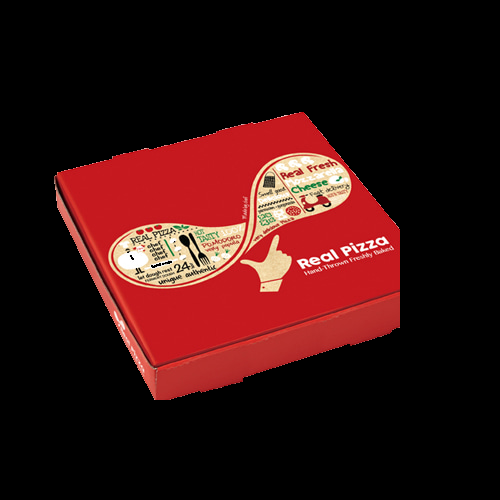

In [ ]:
# 이미지 경로
image_path="./test.png"

# 이미지 읽기
image = cv2.imread(image_path)
print(image.shape)

# 사각형 좌표 : 사각점의 x y 넓이 높이
rectangle = (0, 0, 400, 400)

# 초기 마스크 생성
mask = np.zeros(image.shape[:2], np.uint8)

# grabCut 에 사용할 임시 배열 생성
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

# grabCut 실행
# image -> 원본 이미지, bgdModel -> 배경을 위한 임시 배열, fgdModel -> 전경배경,
# 5 -> 반복횟수, cv2.GC_INIT_WITH_RECT -> 사각형 초기화
cv2. grabCut(image, mask, rectangle, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# 배경인 곳은 0 그 외에는 1로 설정한 마스크
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크 곱해서 -> 배경 제외
image_rgb_nobg = image * mask_2[:,:,np.newaxis]
cv2_imshow(image_rgb_nobg)